In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import tensorflow as tf

2024-07-24 11:49:14.172971: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('DAiSEE/mkesenselabel.csv')
df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,person,89,139,440,337,3100792031125.jpg,640,480
1,person,88,143,451,334,3100792031152.jpg,640,480
2,person,89,138,439,338,310079203118.jpg,640,480
3,person,87,144,453,333,3100792031206.jpg,640,480
4,person,91,144,438,333,3100792031233.jpg,640,480


In [3]:
df.drop(["image_width","image_height"],axis=1,inplace=True)
df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name
0,person,89,139,440,337,3100792031125.jpg
1,person,88,143,451,334,3100792031152.jpg
2,person,89,138,439,338,310079203118.jpg
3,person,87,144,453,333,3100792031206.jpg
4,person,91,144,438,333,3100792031233.jpg


In [4]:
Dataset = [dirt for dirt in os.listdir("DAiSEE/DataSet/") if os.path.isdir(os.path.join("DAiSEE/DataSet",dirt))]
Dataset

['Validation', 'Train', 'Test']

In [5]:
labels = pd.read_csv("DAiSEE/Labels/TrainLabels.csv")
labels.head()

,ClipID,Boredom,Engagement,Confusion,Frustration
0,1100011002.avi,0,2,0,0
1,1100011003.avi,0,2,0,0
2,1100011004.avi,0,3,0,0
3,1100011005.avi,0,3,0,0
4,1100011006.avi,0,3,0,0


In [6]:
df["key"] = df["image_name"].str[:10]
labels["key"] = labels['ClipID'].str[:-4]

In [7]:
processed_Data = pd.merge(df,labels,on='key')
processed_Data["path"] = "DAiSEE/DataSet/Train/"+ processed_Data['ClipID'].str[:6]+'/'+processed_Data['ClipID'].str[:-4]+'/'+processed_Data['image_name'] 
processed_Data.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,key,ClipID,Boredom,Engagement,Confusion,Frustration,path
0,person,89,139,440,337,3100792031125.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...
1,person,88,143,451,334,3100792031152.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...
2,person,89,138,439,338,310079203118.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...
3,person,87,144,453,333,3100792031206.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...
4,person,91,144,438,333,3100792031233.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...


In [8]:
processed_Data.columns

Index(['label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height',
       'image_name', 'key', 'ClipID', 'Boredom', 'Engagement', 'Confusion',
       'Frustration ', 'path'],
      dtype='object')

In [9]:

def add_highest_emotion_column(df):
    # List of emotion columns
    emotion_columns = ['Engagement', 'Confusion', 'Frustration ', 'Boredom']
    
    # Create a new column with the name of the emotion with the highest score
    df['highest_emotion'] = (df[emotion_columns].idxmax(axis=1))
    
    # If there's a tie, we might want to know about it
    #df['is_tie'] = (df[emotion_columns].max(axis=1) == df[emotion_columns]).sum(axis=1) > 1
    
    return df

In [10]:
proc_data = add_highest_emotion_column(processed_Data)
proc_data.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,key,ClipID,Boredom,Engagement,Confusion,Frustration,path,highest_emotion
0,person,89,139,440,337,3100792031125.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement
1,person,88,143,451,334,3100792031152.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement
2,person,89,138,439,338,310079203118.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement
3,person,87,144,453,333,3100792031206.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement
4,person,91,144,438,333,3100792031233.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement


In [11]:
processed_Data.shape

(7550, 14)

In [12]:
processed_Data['path'][1]

'DAiSEE/DataSet/Train/310079/3100792031/3100792031152.jpg'

In [13]:
processed_Data[processed_Data['label_name'] != 'person'].count()

label_name         1044
bbox_x             1044
bbox_y             1044
bbox_width         1044
bbox_height        1044
image_name         1044
key                1044
ClipID             1044
Boredom            1044
Engagement         1044
Confusion          1044
Frustration        1044
path               1044
highest_emotion    1044
dtype: int64

In [14]:
filtered_df = processed_Data[processed_Data['label_name'].str.contains('person') == True]

In [15]:
filtered_df.shape

(6506, 14)

In [16]:
def convert_bbox_columns(df):
    # Create a copy of the DataFrame to ensure we're not working on a slice
    df = df.copy()
    
    # Use .loc for safe assignment
    df.loc[:, 'x_min'] = df['bbox_x'] - (df['bbox_width'] / 2)
    df.loc[:, 'x_max'] = df['bbox_x'] + (df['bbox_width'] / 2)
    df.loc[:, 'y_min'] = df['bbox_y'] - (df['bbox_height'] / 2)
    df.loc[:, 'y_max'] = df['bbox_y'] + (df['bbox_height'] / 2)
    
    return df

In [17]:
filtered_df = convert_bbox_columns(filtered_df)

In [18]:
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os

def add_image_data_column(df, path_column='path', new_column='image_data', verbose=True):
    """
    Add a new column with image data read from file paths and remove rows with missing or unreadable images.
    
    Args:
    df (pandas.DataFrame): The input DataFrame.
    path_column (str): The name of the column containing image paths.
    new_column (str): The name of the new column to store image data.
    verbose (bool): If True, show a progress bar.
    
    Returns:
    pandas.DataFrame: A new DataFrame with the added image data column and invalid rows removed.
    """
    def read_image(path):
        if not os.path.isfile(path):
            return None
        try:
            img_data = tf.io.read_file(path)
            # Try to decode the image to check if it's valid
            tf.image.decode_image(img_data)
            return img_data
        except tf.errors.InvalidArgumentError:
            return None

    if verbose:
        tqdm.pandas(desc="Reading image data")
        df[new_column] = df[path_column].progress_apply(read_image)
    else:
        df[new_column] = df[path_column].apply(read_image)
    
    # Remove rows where image couldn't be read or file doesn't exist
    df_filtered = df.dropna(subset=[new_column])
    
    if verbose:
        print(f"Original DataFrame shape: {df.shape}")
        print(f"Filtered DataFrame shape: {df_filtered.shape}")
        print(f"Removed {df.shape[0] - df_filtered.shape[0]} entries with missing or unreadable images")
    
    return df_filtered

# Usage example:
# df = pd.read_csv('your_dataset.csv')
# df_with_images = add_image_data_column(df)

In [19]:
df = add_image_data_column(filtered_df)

Reading image data: 100%|███████████████████████████████████████████████| 6506/6506 [01:46<00:00, 60.86it/s]

Original DataFrame shape: (6506, 19)
Filtered DataFrame shape: (6287, 19)
Removed 219 entries with missing or unreadable images


In [20]:
df.shape

(6287, 19)

In [21]:
df.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,key,ClipID,Boredom,Engagement,Confusion,Frustration,path,highest_emotion,x_min,x_max,y_min,y_max,image_data
0,person,89,139,440,337,3100792031125.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement,-131.0,309.0,-29.5,307.5,tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,person,88,143,451,334,3100792031152.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement,-137.5,313.5,-24.0,310.0,tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,person,89,138,439,338,310079203118.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement,-130.5,308.5,-31.0,307.0,tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,person,87,144,453,333,3100792031206.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement,-139.5,313.5,-22.5,310.5,tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,person,91,144,438,333,3100792031233.jpg,3100792031,3100792031.avi,0,3,1,1,DAiSEE/DataSet/Train/310079/3100792031/3100792...,Engagement,-128.0,310.0,-22.5,310.5,tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [22]:
df.to_csv("Train_images.csv")

# Encoding dataset

In [23]:
df.columns

Index(['label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height',
       'image_name', 'key', 'ClipID', 'Boredom', 'Engagement', 'Confusion',
       'Frustration ', 'path', 'highest_emotion', 'x_min', 'x_max', 'y_min',
       'y_max', 'image_data'],
      dtype='object')

In [24]:
import tensorflow as tf

def transform_row(row):
    return {
        'image': row['image_data'],  # Read image from path
        'image/filename': row['image_name'],
        'image/id': row['key'],
        'objects': {
            'area': [row['bbox_width'] * row['bbox_height']],
            'bbox': [[row['bbox_x'], row['bbox_y'], row['bbox_width'], row['bbox_height']]],
            'id': [row['key']],  # Assuming each object has a unique key
            'is_crowd': [False],  # Assuming is_crowd is False for all objects
            'label': [row['Boredom'],row['Engagement'],row['Confusion'],row['Frustration ']]  # Assuming label_name is an integer or map it accordingly
        }
    }

In [28]:
def generator():
    for _, row in df.iterrows():
        yield transform_row(row)

# Define the output signature matching the element_spec
output_signature = {
    'image': tf.TensorSpec(shape=(), dtype=tf.string),  # Raw image read as string
    'image/filename': tf.TensorSpec(shape=(), dtype=tf.string),
    'image/id': tf.TensorSpec(shape=(), dtype=tf.int64),
    'objects': {
        'area': tf.TensorSpec(shape=(1,), dtype=tf.int64),
        'bbox': tf.TensorSpec(shape=(1, 4), dtype=tf.float32),
        'id': tf.TensorSpec(shape=(1,), dtype=tf.int64),
        'is_crowd': tf.TensorSpec(shape=(1,), dtype=tf.bool),
        'label': tf.TensorSpec(shape=(4,), dtype=tf.int64)  # Adjust this if label_name is not int
    }
}

In [29]:
# Create the dataset
dataset = tf.data.Dataset.from_generator(generator, output_signature=output_signature)


In [30]:
dataset

<_FlatMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'objects': {'area': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'bbox': TensorSpec(shape=(1, 4), dtype=tf.float32, name=None), 'id': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'is_crowd': TensorSpec(shape=(1,), dtype=tf.bool, name=None), 'label': TensorSpec(shape=(4,), dtype=tf.int64, name=None)}}>

In [31]:
# Process images: decode the raw image data and resize if necessary
def process_image(data):
    image = tf.image.decode_jpeg(data['image'], channels=3)  # Adjust decode function if needed
    data['image'] = image
    return data

In [32]:
da = dataset.map(process_image)
da

<_MapDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'objects': {'area': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'bbox': TensorSpec(shape=(1, 4), dtype=tf.float32, name=None), 'id': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'is_crowd': TensorSpec(shape=(1,), dtype=tf.bool, name=None), 'label': TensorSpec(shape=(4,), dtype=tf.int64, name=None)}}>

In [33]:
for sample in da.take(1):
    print(sample)

{'image': <tf.Tensor: shape=(480, 640, 3), dtype=uint8, numpy=
array([[[194, 181, 188],
        [194, 181, 188],
        [194, 181, 188],
        ...,
        [188, 182, 196],
        [188, 182, 196],
        [188, 182, 196]],

       [[194, 181, 188],
        [194, 181, 188],
        [194, 181, 188],
        ...,
        [188, 182, 196],
        [188, 182, 196],
        [188, 182, 196]],

       [[194, 181, 188],
        [194, 181, 188],
        [194, 181, 188],
        ...,
        [188, 182, 196],
        [188, 182, 196],
        [188, 182, 196]],

       ...,

       [[ 29,  32,  41],
        [ 29,  32,  41],
        [ 29,  32,  41],
        ...,
        [ 47,  49,  61],
        [ 47,  49,  61],
        [ 47,  49,  61]],

       [[ 29,  32,  41],
        [ 29,  32,  41],
        [ 29,  32,  41],
        ...,
        [ 47,  49,  61],
        [ 47,  49,  61],
        [ 47,  49,  61]],

       [[ 29,  32,  41],
        [ 29,  32,  41],
        [ 29,  32,  41],
        ...,
        [ 4

In [34]:
type(da)

tensorflow.python.data.ops.map_op._MapDataset

In [35]:
import tensorflow as tf

def reshape_objects(example):
    objects = example['objects']
    reshaped_objects = {
        'area': tf.reshape(objects['area'], [-1]),
        'bbox': tf.reshape(objects['bbox'], [-1, 4]),
        'id': tf.reshape(objects['id'], [-1]),
        'is_crowd': tf.reshape(objects['is_crowd'], [-1]),
        'label': tf.reshape(objects['label'], [-1])
    }
    example['objects'] = reshaped_objects
    example['image'] = example['image']
    return example

# Assuming your current dataset is named 'dataset'
modified_dataset = da.map(reshape_objects)

# Convert to PrefetchDataset
prefetch_dataset = modified_dataset.prefetch(tf.data.AUTOTUNE)

In [36]:
prefetch_dataset

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'objects': {'area': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'bbox': TensorSpec(shape=(1, 4), dtype=tf.float32, name=None), 'id': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'is_crowd': TensorSpec(shape=(1,), dtype=tf.bool, name=None), 'label': TensorSpec(shape=(4,), dtype=tf.int64, name=None)}}>

In [37]:
def resize_and_pad_image(
    image, min_side=800.0, max_side=1333.0, jitter=[640, 1024], stride=128.0
):
    """Resizes and pads image while preserving aspect ratio.

    1. Resizes images so that the shorter side is equal to `min_side`
    2. If the longer side is greater than `max_side`, then resize the image
      with longer side equal to `max_side`
    3. Pad with zeros on right and bottom to make the image shape divisible by
    `stride`

    Arguments:
      image: A 3-D tensor of shape `(height, width, channels)` representing an
        image.
      min_side: The shorter side of the image is resized to this value, if
        `jitter` is set to None.
      max_side: If the longer side of the image exceeds this value after
        resizing, the image is resized such that the longer side now equals to
        this value.
      jitter: A list of floats containing minimum and maximum size for scale
        jittering. If available, the shorter side of the image will be
        resized to a random value in this range.
      stride: The stride of the smallest feature map in the feature pyramid.
        Can be calculated using `image_size / feature_map_size`.

    Returns:
      image: Resized and padded image.
      image_shape: Shape of the image before padding.
      ratio: The scaling factor used to resize the image
    """
    image_shape = tf.cast(tf.shape(image)[:2], dtype=tf.float32)
    if jitter is not None:
        min_side = tf.random.uniform((), jitter[0], jitter[1], dtype=tf.float32)
    ratio = min_side / tf.reduce_min(image_shape)
    if ratio * tf.reduce_max(image_shape) > max_side:
        ratio = max_side / tf.reduce_max(image_shape)
    image_shape = ratio * image_shape
    image = tf.image.resize(image, tf.cast(image_shape, dtype=tf.int32))
    padded_image_shape = tf.cast(
        tf.math.ceil(image_shape / stride) * stride, dtype=tf.int32
    )
    image = tf.image.pad_to_bounding_box(
        image, 0, 0, padded_image_shape[0], padded_image_shape[1]
    )
    return image, image_shape, ratio


In [38]:
for sample in prefetch_dataset.take(2):
    image = tf.cast(sample['image'],dtype=tf.uint8)
    image, _, ratio = resize_and_pad_image(image, jitter=None)
    image = tf.keras.applications.resnet.preprocess_input(image)
    imput_image = tf.expand_dims(image, axis=0)

(480, 640, 3)
<dtype: 'uint8'>
tf.Tensor(
[[[194 181 188]
  [194 181 188]
  [194 181 188]
  ...
  [188 182 196]
  [188 182 196]
  [188 182 196]]

 [[194 181 188]
  [194 181 188]
  [194 181 188]
  ...
  [188 182 196]
  [188 182 196]
  [188 182 196]]

 [[194 181 188]
  [194 181 188]
  [194 181 188]
  ...
  [188 182 196]
  [188 182 196]
  [188 182 196]]

 ...

 [[ 30  33  42]
  [ 30  33  42]
  [ 30  33  42]
  ...
  [ 46  48  60]
  [ 46  48  60]
  [ 46  48  60]]

 [[ 30  33  42]
  [ 30  33  42]
  [ 30  33  42]
  ...
  [ 46  48  60]
  [ 46  48  60]
  [ 46  48  60]]

 [[ 30  33  42]
  [ 30  33  42]
  [ 30  33  42]
  ...
  [ 46  48  60]
  [ 46  48  60]
  [ 46  48  60]]], shape=(480, 640, 3), dtype=uint8)


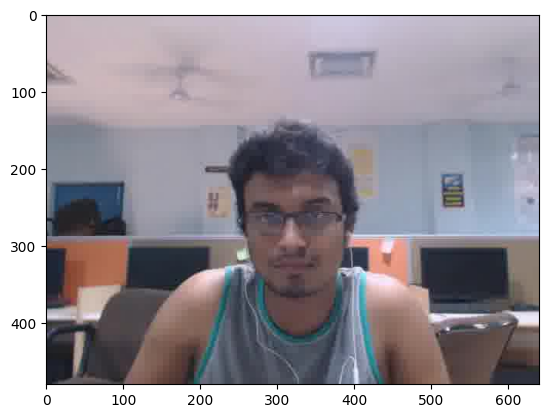

In [39]:
import numpy as np

# Sample image data with incorrect shape and out-of-range values
image_data = np.array(imput_image)

# Correct the shape by removing the first dimension
image_data = image_data[0]

# Clip values to the valid range for imshow
image_data = np.clip(image_data, 0, 255).astype(np.uint8)

print(sample['image'].shape)  # Output: (896, 1152, 3)
print(sample['image'].dtype)  # Output: uint8
print(sample['image'])
plt.imshow(sample['image'])

In [41]:
import tensorflow as tf
import numpy as np

def serialize_example(example):
    def _bytes_feature(value):
        if value is None:
            return tf.train.Feature()
        if isinstance(value, type(tf.constant(0))):
            value = value.numpy()
        if isinstance(value, np.ndarray):
            value = value.tobytes()
        elif isinstance(value, str):
            value = value.encode()
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

    def _int64_feature(value):
        if value is None:
            return tf.train.Feature()
        if isinstance(value, np.ndarray):
            value = value.flatten()
        elif tf.is_tensor(value):
            value = value.numpy().flatten()
        else:
            value = [value]
        return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

    def _float_feature(value):
        if value is None:
            return tf.train.Feature()
        if isinstance(value, np.ndarray):
            value = value.flatten()
        elif tf.is_tensor(value):
            value = value.numpy().flatten()
        else:
            value = [value]
        return tf.train.Feature(float_list=tf.train.FloatList(value=value))

    feature = {
        'image': _bytes_feature(example.get('image')),
        'image/filename': _bytes_feature(example.get('image/filename')),
        'image/id': _int64_feature(example.get('image/id')),
        'objects/area': _int64_feature(example['objects'].get('area') if isinstance(example.get('objects'), dict) else None),
        'objects/bbox': _float_feature(example['objects'].get('bbox') if isinstance(example.get('objects'), dict) else None),
        'objects/id': _int64_feature(example['objects'].get('id') if isinstance(example.get('objects'), dict) else None),
        'objects/is_crowd': _int64_feature(tf.cast(example['objects'].get('is_crowd'), tf.int64) if isinstance(example.get('objects'), dict) else None),
        'objects/label': _int64_feature(example['objects'].get('label') if isinstance(example.get('objects'), dict) else None)
    }

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

def write_tfrecords(dataset, filename):
    writer = tf.io.TFRecordWriter(filename)
    
    # Convert the dataset to a Python iterable
    dataset_iter = iter(dataset)
    
    while True:
        try:
            example = next(dataset_iter)
            if example is None:
                print("Skipping None example")
                continue  # Skip to the next example
            else:
                tf_example = serialize_example(example)
                writer.write(tf_example)
        # ... rest of your processing logic for the example
        except StopIteration:
            break
        except Exception as e:
            print(f"Error processing example: {e}")
            break
    
    writer.close()
    print(f"TFRecord file saved: {filename}")

# Usage:
# write_tfrecords(prefetch_dataset, 'data.tfrecords')
write_tfrecords(prefetch_dataset, 'data.tfrecords')

TFRecord file saved: data.tfrecords


In [59]:
import tensorflow as tf
import numpy as np

def serialize_example(example):
    def _bytes_feature(value):
        if value is None:
            return tf.train.Feature()
        if isinstance(value, type(tf.constant(0))):
            value = value.numpy()
        if isinstance(value, np.ndarray):
            value = value.tobytes()
        elif isinstance(value, str):
            value = value.encode()
        return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

    def _int64_feature(value):
        if value is None:
            return tf.train.Feature()
        if isinstance(value, np.ndarray):
            value = value.flatten().tolist()
        elif tf.is_tensor(value):
            value = value.numpy().flatten().tolist()
        else:
            value = [value]
        return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

    def _float_feature(value):
        if value is None:
            return tf.train.Feature()
        if isinstance(value, np.ndarray):
            value = value.flatten().tolist()
        elif tf.is_tensor(value):
            value = value.numpy().flatten().tolist()
        else:
            value = [value]
        return tf.train.Feature(float_list=tf.train.FloatList(value=value))

    feature = {
        'image': _bytes_feature(example.get('image')),
        'image/filename': _bytes_feature(example.get('image/filename')),
        'image/id': _int64_feature(example.get('image/id')),
        'objects/area': _int64_feature(example['objects'].get('area') if isinstance(example.get('objects'), dict) else None),
        'objects/bbox': _float_feature(example['objects'].get('bbox') if isinstance(example.get('objects'), dict) else None),
        'objects/id': _int64_feature(example['objects'].get('id') if isinstance(example.get('objects'), dict) else None),
        'objects/is_crowd': _int64_feature(example['objects'].get('is_crowd') if isinstance(example.get('objects'), dict) else None),
        'objects/label': _int64_feature(example['objects'].get('label') if isinstance(example.get('objects'), dict) else None)
    }

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

def write_tfrecords(dataset, filename):
    writer = tf.io.TFRecordWriter(filename)
    
    # Convert the dataset to a numpy iterator
    dataset_iter = dataset.as_numpy_iterator()
    
    count = 0
    error_count = 0
    
    while True:
        try:
            example = next(dataset_iter)
            if example is None:
                print("Skipping None example")
                error_count += 1
                continue
            
            try:
                tf_example = serialize_example(example)
                writer.write(tf_example)
                count += 1
                if count % 100 == 0:
                    print(f"Processed {count} examples")
            except Exception as e:
                print(f"Error processing example: {e}")
                error_count += 1
        except StopIteration:
            break
        except Exception as e:
            print(f"Error iterating dataset: {e}")
            error_count += 1
    
    writer.close()
    print(f"TFRecord file saved: {filename}")
    print(f"Processed {count} examples successfully")
    print(f"Encountered {error_count} errors")

# Usage:
write_tfrecords(da, 'daisee.tfrecords')

Processed 100 examples
Processed 200 examples
Processed 300 examples
Processed 400 examples
Processed 500 examples
Processed 600 examples
Processed 700 examples
Processed 800 examples
Processed 900 examples
Processed 1000 examples
Processed 1100 examples
Processed 1200 examples
Processed 1300 examples
Processed 1400 examples
Processed 1500 examples
Processed 1600 examples
Processed 1700 examples
Processed 1800 examples
Processed 1900 examples
Processed 2000 examples
Processed 2100 examples
Processed 2200 examples
Processed 2300 examples
Processed 2400 examples
Processed 2500 examples
Processed 2600 examples
Processed 2700 examples
Processed 2800 examples
Processed 2900 examples
Processed 3000 examples
Processed 3100 examples
Processed 3200 examples
Processed 3300 examples
Processed 3400 examples
Processed 3500 examples
Processed 3600 examples
Processed 3700 examples
Processed 3800 examples
Processed 3900 examples
Processed 4000 examples
Processed 4100 examples
Processed 4200 examples
P

In [76]:
da

<_MapDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'objects': {'area': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'bbox': TensorSpec(shape=(1, 4), dtype=tf.float32, name=None), 'id': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'is_crowd': TensorSpec(shape=(1,), dtype=tf.bool, name=None), 'label': TensorSpec(shape=(4,), dtype=tf.int64, name=None)}}>

# Encode with claude

In [72]:
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.numpy()]))

In [73]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value.numpy()]))

In [74]:
def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value.numpy().flatten()))

In [75]:
def _bool_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[int(value.numpy())]))

In [86]:
def jpg_to_tensor(file_path):
    # Read the file
    image_raw = tf.io.read_file(file_path)
    
    # Decode the JPG image to a uint8 tensor
    image_tensor = tf.io.decode_jpeg(image_raw, channels=3)
    
    # The resulting tensor will have shape (height, width, 3) and dtype uint8
    return image_tensor

In [125]:
def serialize_example(example):
    feature = {
        'image': _bytes_feature(jpg_to_tensor(f"{example['path']}")),
        'image/filename': _bytes_feature(example['image/filename']),
        'image/id': _int64_feature(example['image/id']),
        'objects/area': _int64_feature(example['objects']['area'][0]),
        'objects/bbox': _float_feature(example['objects']['bbox'][0]),
        'objects/id': _int64_feature(example['objects']['id'][0]),
        'objects/is_crowd': _bool_feature(example['objects']['is_crowd'][0]),
        'objects/label': _int64_feature(example['objects']['label'][0])
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [126]:
def dataset_to_tfrecord(dataset, filename):
    with tf.io.TFRecordWriter(filename) as writer:
        for example in dataset:
            tf_example = serialize_example(example)
            writer.write(tf_example)

In [127]:
dataset_to_tfrecord(processed_Data,"output.tfrecord")

TypeError: string indices must be integers

In [14]:
tf.io.read_file(processed_Data['path'][5]).numpy()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00\x10Lavc60.31.102\x00\xff\xdb\x00C\x00\x0822;2;DDDDDDQKQTTTQQQQTTTZZZjjjZZZTTZZddjjsvsmmjmvv}}}\x96\x96\x8f\x8f\xaf\xaf\xb5\xd7\xd7\xff\xff\xc4\x00|\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x03\x04\x02\x01\x06\x07\x08\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x10\x01\x01\x00\x02\x01\x03\x03\x02\x06\x02\x03\x01\x01\x00\x00\x00\x00\x01\x02\x11\x121!\x03Q\x13Aq2"\x91a\x04\x14\xf0B\x81\xb1\xc1R\xa1b\x11\x01\x01\x01\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x11\x021A!\x122\x81\x03Q\xff\xc0\x00\x11\x08\x01\xe0\x02\x80\x03\x01"\x00\x02\x11\x00\x03\x11\x00\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xee\x80\x06\xd9\xa0,\r\x81\xa0\x10\x01\xa01\xa0\x00\x00\x005\x8da\x80\x00 \x16\x00\x1b@\n \x00\x00\x00\x00hcL,\x14i\x92\xc1Pd\xb3Th\x0b\x85Z\t\xadT\x19\xac\xd5@5\xc2\x8d\tX*\x008\xb1\xb5\x94K\xb5@d\xb86\

In [116]:
jpg_to_tensor(processed_Data['path'][5])

<tf.Tensor: shape=(480, 640, 3), dtype=uint8, numpy=
array([[[194, 181, 188],
        [194, 181, 188],
        [194, 181, 188],
        ...,
        [188, 182, 196],
        [188, 182, 196],
        [188, 182, 196]],

       [[194, 181, 188],
        [194, 181, 188],
        [194, 181, 188],
        ...,
        [188, 182, 196],
        [188, 182, 196],
        [188, 182, 196]],

       [[194, 181, 188],
        [194, 181, 188],
        [194, 181, 188],
        ...,
        [188, 182, 196],
        [188, 182, 196],
        [188, 182, 196]],

       ...,

       [[ 30,  34,  43],
        [ 30,  34,  43],
        [ 30,  34,  43],
        ...,
        [ 47,  49,  62],
        [ 47,  49,  62],
        [ 47,  49,  62]],

       [[ 30,  34,  43],
        [ 30,  34,  43],
        [ 30,  34,  43],
        ...,
        [ 47,  49,  62],
        [ 47,  49,  62],
        [ 47,  49,  62]],

       [[ 30,  34,  43],
        [ 30,  34,  43],
        [ 30,  34,  43],
        ...,
        [ 47,  49,  6

In [103]:
jp

NameError: name 'jp' is not defined

# Hypothisis

In [60]:
def list_record_features(tfrecords_path):
    # Dict of extracted feature information
    features = {}
    # Iterate records
    for rec in tf.data.TFRecordDataset([str(tfrecords_path)]):
        # Get record bytes
        example_bytes = rec.numpy()
        # Parse example protobuf message
        example = tf.train.Example()
        example.ParseFromString(example_bytes)
        # Iterate example features
        for key, value in example.features.feature.items():
            # Kind of data in the feature
            kind = value.WhichOneof('kind')
            # Size of data in the feature
            size = len(getattr(value, kind).value)
            # Check if feature was seen before
            if key in features:
                # Check if values match, use None otherwise
                kind2, size2 = features[key]
                if kind != kind2:
                    kind = None
                if size != size2:
                    size = None
            # Save feature data
            features[key] = (kind, size)
    return features

In [62]:
features = list_record_features("daisee.tfrecords")
print(*features.items(), sep='\n')

('objects/bbox', ('float_list', 4))
('objects/is_crowd', ('int64_list', 1))
('objects/label', ('int64_list', 4))
('objects/id', ('int64_list', 1))
('objects/area', ('int64_list', 1))
('image/filename', ('bytes_list', 1))
('image/id', ('int64_list', 1))
('image', ('bytes_list', 1))
